# Análise do COVID-19 no Brasil (Infectados)

## 1. Base de Dados Original

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')

df = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,64,64,73,103,103,186,231,271,424,424
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,92,112,134,171,210,267,307,353,436,533
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,36,49,57,71,94,121,121,121,229,296
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,35,46,61,68,78,94,144,184,221,221
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,5,7,7,7,33,35,37,51,53,84


## 2. Total de casos diários no mundo (ordenação decrescente)

In [2]:
def getSortedGroupByCountryDataframe(df):
    confirmedCasesGroupedDf = df.groupby('Country/Region').sum()
    sortedConfirmedCasesGroupedDf = confirmedCasesGroupedDf.sort_values(by=['Confirmed Cases'], ascending = False)
    return sortedConfirmedCasesGroupedDf

In [3]:
confirmedCasesDf = df.copy()
column_list = list(confirmedCasesDf)
column_last_day = column_list[-1:]
confirmedCasesDf = confirmedCasesDf.drop(['Province/State', 'Lat', 'Long'], axis=1)
confirmedCasesDf["Confirmed Cases"] = confirmedCasesDf[column_last_day].astype('int32')

sortedConfirmedCasesGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesDf)
sortedConfirmedCasesGroupedDf.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80977,81003,81033,81058,81102,81156,81250,81305,81397,81397
Italy,0,0,0,0,0,0,0,0,0,2,...,21157,24747,27980,31506,35713,41035,47021,53578,59138,59138
US,1,1,2,2,5,5,5,5,5,7,...,2727,3499,4632,6421,7783,13677,19100,25489,33272,33272
Spain,0,0,0,0,0,0,0,0,0,0,...,6391,7798,9942,11748,13910,17963,20410,25374,28768,28768
Germany,0,0,0,0,0,1,4,4,4,5,...,4585,5795,7272,9257,12327,15320,19848,22213,24873,24873
Iran,0,0,0,0,0,0,0,0,0,0,...,12729,13938,14991,16169,17361,18407,19644,20610,21638,21638
France,0,0,2,3,3,3,4,5,5,5,...,4487,4523,6668,7699,9105,10947,12726,14431,16176,16176
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,8086,8162,8236,8320,8413,8565,8652,8799,8897,8897
Switzerland,0,0,0,0,0,0,0,0,0,0,...,1359,2200,2200,2700,3028,4075,5294,6575,7245,7245


### 2.1 Total de casos diários somente no Brasil

In [4]:
confirmedCasesByDayBrazilDf = sortedConfirmedCasesGroupedDf.loc[['Brazil']]
confirmedCasesByDayBrazilDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,0,0,0,0,0,0,0,0,0,0,...,151,162,200,321,372,621,793,1021,1593,1593


In [5]:
dates = list(confirmedCasesByDayBrazilDf)[:-1]
infected = confirmedCasesByDayBrazilDf.iloc[0,:-1]

dfForPlot = pd.DataFrame(
    {'date': dates, 'infected': infected})
dfForPlot['date'] = pd.to_datetime(dfForPlot['date'])
dfForPlot.tail(10)

,date,infected
3/13/20,2020-03-13,151
3/14/20,2020-03-14,151
3/15/20,2020-03-15,162
3/16/20,2020-03-16,200
3/17/20,2020-03-17,321
3/18/20,2020-03-18,372
3/19/20,2020-03-19,621
3/20/20,2020-03-20,793
3/21/20,2020-03-21,1021
3/22/20,2020-03-22,1593


Text(0, 0.5, 'Number of cases')

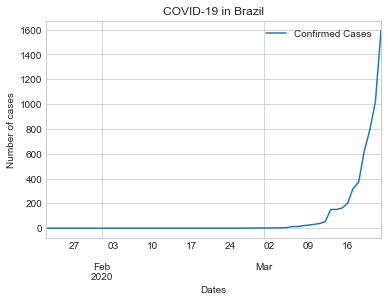

In [6]:
fig = plt.figure()
ax = plt.axes()
dfForPlot.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Brazil")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

### 2.2 Total de casos diários somente na Itália

In [7]:
confirmedCasesByDayItalyDf = sortedConfirmedCasesGroupedDf.loc[['Italy']]
confirmedCasesByDayItalyDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,2,...,21157,24747,27980,31506,35713,41035,47021,53578,59138,59138


In [8]:
datesItaly = list(confirmedCasesByDayItalyDf)[:-1]
infectedItaly = confirmedCasesByDayItalyDf.iloc[0,:-1]

dfForPlotItaly = pd.DataFrame(
    {'date': datesItaly, 'infected': infectedItaly})
dfForPlotItaly['date'] = pd.to_datetime(dfForPlotItaly['date'])
dfForPlotItaly.tail()

,date,infected
3/18/20,2020-03-18,35713
3/19/20,2020-03-19,41035
3/20/20,2020-03-20,47021
3/21/20,2020-03-21,53578
3/22/20,2020-03-22,59138


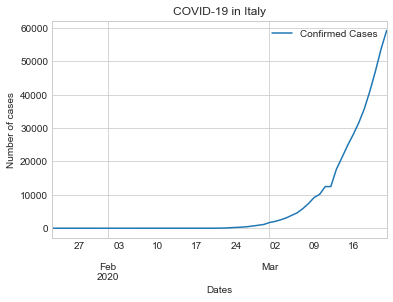

In [9]:
fig = plt.figure()
ax = plt.axes()
dfForPlotItaly.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Italy")
plt.xlabel("Dates")
plt.ylabel("Number of cases")
plt.legend()

## 3. Total de casos diários acumulados por país (ordenação decrescente)

In [10]:
confirmedCasesOnlyDf = confirmedCasesDf.drop(confirmedCasesDf.columns.difference(['Country/Region','Confirmed Cases']), 1)
confirmedCasesOnlyDf = confirmedCasesOnlyDf.sort_values(by=['Confirmed Cases'],ascending=False)

sortedConfirmedCasesOnlyGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesOnlyDf)
sortedConfirmedCasesOnlyGroupedDf

,Confirmed Cases
Country/Region,
China,81397
Italy,59138
US,33272
Spain,28768
Germany,24873
...,...
Somalia,1
Djibouti,1
Chad,1


### 3.1 Total de casos diários acumulados no Brasil

In [11]:
confirmedCasesTotalBrazilDf = sortedConfirmedCasesOnlyGroupedDf.loc[['Brazil']]
confirmedCasesTotalBrazilDf

,Confirmed Cases
Country/Region,
Brazil,1593


## 4. Previsão por meio da Regressão

### 4.0 Dados comuns a todos os algoritmos abaixo

In [12]:
def plotGraph(X, y, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'dates': X, 'infected': y.astype(int)})
    df['dates'] = pd.to_datetime(df['dates'])

    fig = plt.figure()
    ax = plt.axes()
    redLine = plt.plot(XReal, yReal, 'r:', label='Confirmed Cases')
    df.set_index('dates')['infected'].plot(legend=True, grid=True, label='Predicted Cases')
    plt.title("COVID-19 in Brazil ("+algorithm+")")
    plt.xlabel("Dates")
    plt.ylabel("Number of cases")
    
    blue_patch = mpatches.Patch(color='blue', label='Predicted Cases')
    red_patch = mpatches.Patch(color='red', label='Confirmed Cases')
    plt.legend(handles=[red_patch, blue_patch])

In [13]:
import datetime

diasASimular = 60
dfForPlotDaysWithInfected = dfForPlot[dfForPlot['infected'] != 0]

XTrain = np.arange(0, len(dfForPlotDaysWithInfected['date']))
yTrain = dfForPlotDaysWithInfected['infected']

XPredict = np.arange(0, len(XTrain) + diasASimular)

XRealCases = dfForPlotDaysWithInfected['date']
yRealCases = dfForPlotDaysWithInfected['infected']

predictedDays = pd.date_range(dfForPlotDaysWithInfected['date'].iloc[-1] + datetime.timedelta(days=1), periods=diasASimular, freq='D')
X = np.append(dfForPlotDaysWithInfected['date'], predictedDays)

### 4.1 Regressão Linear

In [14]:
#treino
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(XTrain.reshape(-1, 1), yTrain)

#predição
y = LRModel.predict(XPredict.reshape(-1, 1)).astype(int)
y = y + y[0] * -1
y

array([   0,   38,   75,  113,  150,  188,  225,  262,  299,  337,  374,
        412,  449,  486,  524,  561,  599,  636,  674,  711,  749,  786,
        824,  861,  899,  936,  974, 1011, 1048, 1086, 1123, 1161, 1198,
       1236, 1273, 1311, 1348, 1386, 1423, 1461, 1498, 1535, 1573, 1610,
       1648, 1685, 1723, 1760, 1798, 1835, 1873, 1910, 1948, 1985, 2023,
       2060, 2097, 2135, 2172, 2210, 2247, 2285, 2322, 2360, 2397, 2435,
       2472, 2510, 2547, 2584, 2622, 2659, 2697, 2734, 2772, 2809, 2847,
       2884, 2922, 2959, 2997, 3034, 3072, 3109, 3146, 3184])

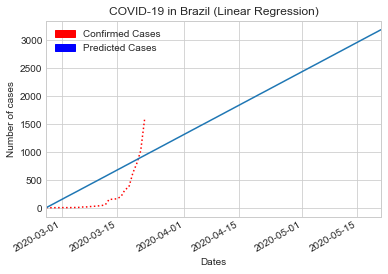

In [15]:
plotGraph(X, y, XRealCases, yRealCases, "Linear Regression")

### 4.2 Polynomial Regression 2D

In [16]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

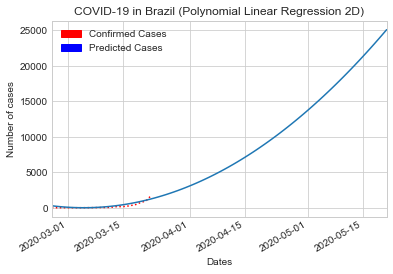

In [17]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 2D")

### 4.3 Polynomial Regression 3D

In [18]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 3)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

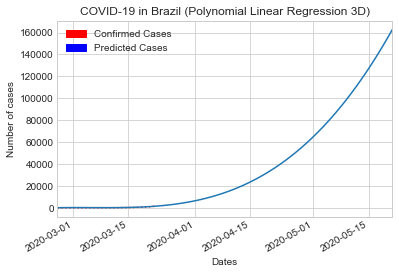

In [19]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 3D")

### 4.4 Polynomial Regression 4D

In [20]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 4)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

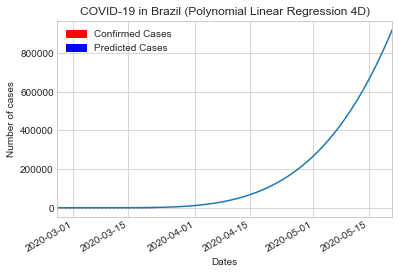

In [21]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 4D")